# xsab V

In [5]:
from radd import build, vis
from radd.toolbox import analyze
#os.mkdir('xsab_tr')
#os.chdir('xsab_tr')
popt={'a': array([ 0.53625]), 'xb': array([ 0.87761]), 'ssv': -0.98396462152356978, 'tr': array([ 0.17801]), 'v': array([ 1.26793])}
#popt={'a': array([ 0.48227]), 'sso': 0.01804612312742325, 'v': array([ 1.18368, 1.10]), 'xb': array([ 1.43943]), 'ssv': -0.93274357892086091, 'tr': array([ 0.21019])}
m=build.Model(data=redata, kind='xsab', depends_on={'v':'Cond'}, inits=popt)
yhat=m.simulate(popt)

In [54]:
#v = popt['v']
p = deepcopy(popt)

v = popt['v']*array([1.05,.95])

In [76]:
v = popt['v']*array([1.03,.97])
v

array([ 1.30597,  1.22989])

In [6]:
m.inits

{'a': array([ 0.53625,  0.53625]),
 'ssv': -0.9839646215235698,
 'tr': array([ 0.17801,  0.17801]),
 'v': array([ 1.26793,  1.26793]),
 'xb': array([ 0.87761,  0.87761])}

In [7]:
m.optimize(stage='flat', multiopt=True)

basinhopping step 0: f 0.00245923
basinhopping step 1: f 0.128707 trial_f 0.128707 accepted 1  lowest_f 0.00245923
basinhopping step 2: f 0.128707 trial_f 0.682531 accepted 0  lowest_f 0.00245923
basinhopping step 3: f 0.128707 trial_f 0.672576 accepted 0  lowest_f 0.00245923
basinhopping step 4: f 0.15479 trial_f 0.15479 accepted 1  lowest_f 0.00245923
basinhopping step 5: f 0.396763 trial_f 0.396763 accepted 1  lowest_f 0.00245923
basinhopping step 6: f 0.202393 trial_f 0.202393 accepted 1  lowest_f 0.00245923
basinhopping step 7: f 0.040422 trial_f 0.040422 accepted 1  lowest_f 0.00245923
basinhopping step 8: f 0.0714999 trial_f 0.0714999 accepted 1  lowest_f 0.00245923
basinhopping step 9: f 0.0139182 trial_f 0.0139182 accepted 1  lowest_f 0.00245923
adaptive stepsize: acceptance rate 0.700000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.00503098 trial_f 0.00503098 accepted 1  lowest_f 0.00245923
basinhopping step 11: f 0.140967 trial_f 0.14096

In [103]:
m.optimize(stage='conditional', inits=p, multiopt=False)

Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 25
         Function evaluations: 68


In [240]:
m.fitin

a           0.53625
chi       0.0051466
cnvrg          True
ndata            32
nfev             68
nvary             2
ssv        -0.98396
tr          0.17801
v_bsl        1.2887
v_pnl        1.2436
xb          0.87761
df               30
rchi     0.00017155
logp        -277.46
AIC         -273.46
BIC          -273.3
dtype: object

In [80]:
m.opt.basinhopping_full(p, is_flat=False)

basinhopping step 0: f 0.0163419
basinhopping step 1: f 0.0175948 trial_f 0.0175948 accepted 1  lowest_f 0.0163419
basinhopping step 2: f 0.0215774 trial_f 0.0215774 accepted 1  lowest_f 0.0163419
basinhopping step 3: f 0.0294522 trial_f 0.0294522 accepted 1  lowest_f 0.0163419
basinhopping step 4: f 0.0262396 trial_f 0.0262396 accepted 1  lowest_f 0.0163419
basinhopping step 5: f 0.0607789 trial_f 0.0607789 accepted 1  lowest_f 0.0163419
basinhopping step 6: f 0.111122 trial_f 0.111122 accepted 1  lowest_f 0.0163419
basinhopping step 7: f 0.159255 trial_f 0.159255 accepted 1  lowest_f 0.0163419
basinhopping step 8: f 0.104613 trial_f 0.104613 accepted 1  lowest_f 0.0163419
basinhopping step 9: f 0.0632053 trial_f 0.0632053 accepted 1  lowest_f 0.0163419
adaptive stepsize: acceptance rate 0.900000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.0837775 trial_f 0.0837775 accepted 1  lowest_f 0.0163419
basinhopping step 11: f 0.106207 trial_f 0.106207 a

({'a': 0.53625,
  'ssv': -0.9839646215235698,
  'tr': 0.17801,
  'v': array([ 1.30285,  1.25815]),
  'xb': 0.87761},
 0.0071903631040588518)

In [129]:
xopt = {'a': array([ 0.53527]),
 'ssv': -0.98604097563709558,
 'tr': array([ 0.17811]),
 'v': array([ 1.26625]),
 'xb': array([ 0.86314])}

In [121]:
p={'a': 0.53625,
  'ssv': -0.9839646215235698,
  'tr': 0.17801,
  'v': array([ 1.30285,  1.25815]),
  'xb': 0.87761}

In [127]:
#popt['v']=popt['v']*array()
#p['v']=v
yhat=m.simulate(p)
#yhat = yhat.reshape(2,16)

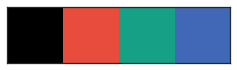

In [148]:
c = ["#16a085", '#4168B7', "#e74c3c"]

# Est. Data Distributions 

In [189]:
sc = [vis.unpack_yvector(yi)[0] for yi in y]
cq = [vis.unpack_yvector(yi)[1] for yi in y]
eq = [vis.unpack_yvector(yi)[2] for yi in y]
data_kde_all = [[analyze.kde_fit_quantiles(q, bw=.1) for q in [cq[i], eq[i]]] for i in range(2)]

# Load up model pred. 

In [156]:
tr = array([ 0.967  ,  1.     ,  0.9988 ,  0.9206 ,  0.4612 ,  0.1226 ,
        0.52094,  0.54794,  0.56694,  0.58794,  0.61694,  0.51394,
        0.53694,  0.55594,  0.57494,  0.60194,  0.9424 ,  1.     ,
        1.     ,  0.9576 ,  0.5806 ,  0.1596 ,  0.53034,  0.55534,
        0.57634,  0.59734,  0.62434,  0.52134,  0.54634,  0.56334,
        0.58234,  0.60934])
a = array([ 0.9698 ,  1.     ,  0.9998 ,  0.9268 ,  0.4936 ,  0.117  ,
        0.51611,  0.54511,  0.56411,  0.58511,  0.61611,  0.50811,
        0.53311,  0.55311,  0.57211,  0.60011,  0.928  ,  1.     ,
        0.9994 ,  0.9534 ,  0.5852 ,  0.184  ,  0.53411,  0.56311,
        0.58211,  0.60311,  0.62811,  0.52611,  0.55111,  0.57111,
        0.59011,  0.61411])
v = array([ 0.9737 ,  1.     ,  0.9988 ,  0.913  ,  0.4444 ,  0.1062 ,
        0.51801,  0.54501,  0.56401,  0.58501,  0.61301,  0.51001,
        0.53501,  0.55401,  0.57101,  0.59801,  0.9417 ,  1.     ,
        0.9992 ,  0.9394 ,  0.5454 ,  0.1628 ,  0.52701,  0.55401,
        0.57301,  0.59401,  0.62301,  0.51801,  0.54301,  0.56201,
        0.57901,  0.60801])
vtr = array([ 0.9621 ,  1.     ,  0.9996 ,  0.9332 ,  0.4894 ,  0.1268 ,
        0.52344,  0.55044,  0.56944,  0.59044,  0.61944,  0.51644,
        0.54144,  0.56044,  0.57744,  0.60444,  0.9341 ,  1.     ,
        0.9998 ,  0.9452 ,  0.5766 ,  0.1666 ,  0.53008,  0.55908,
        0.57808,  0.59908,  0.62608,  0.51908,  0.54708,  0.56508,
        0.58408,  0.61108])
yhats = [v, tr, a, vtr]
savestrings = ['v', 'tr', 'a', 'vtr']
colors = ["#16a085", '#4168B7', "#e74c3c", "#e67e22"]

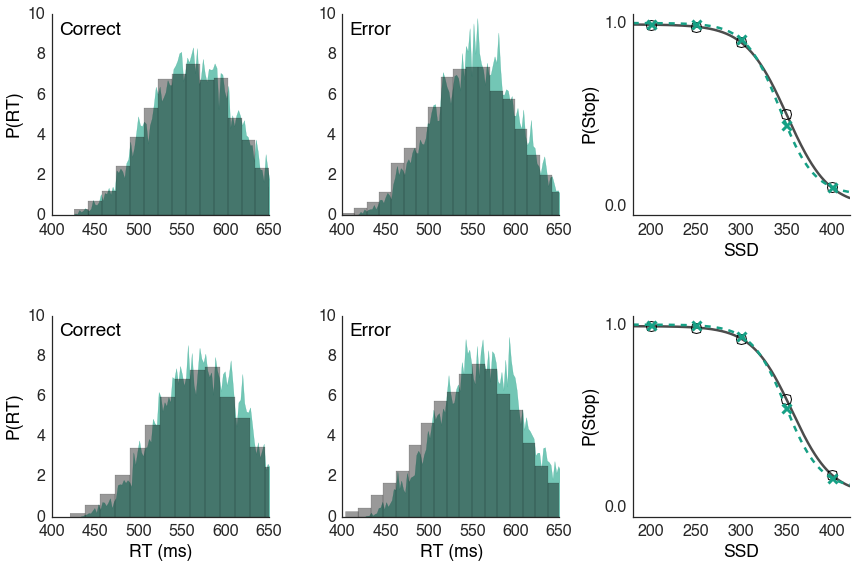

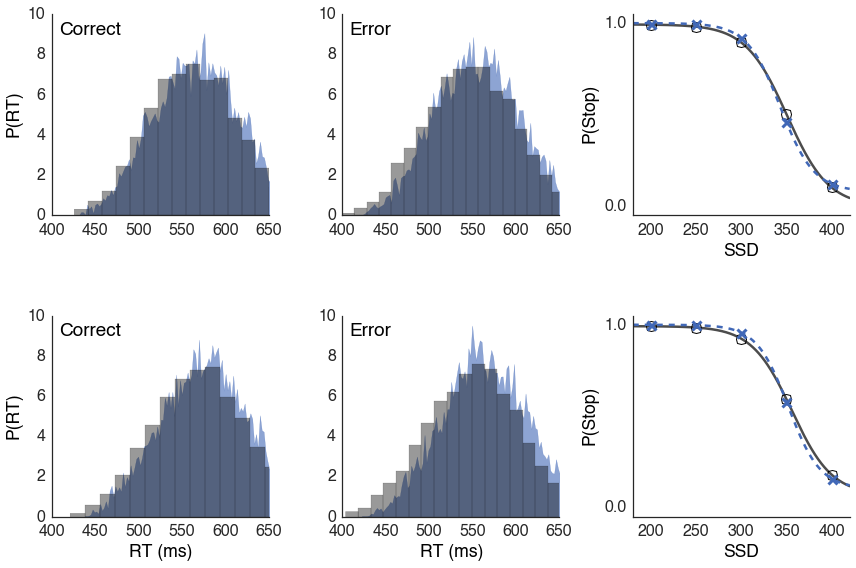

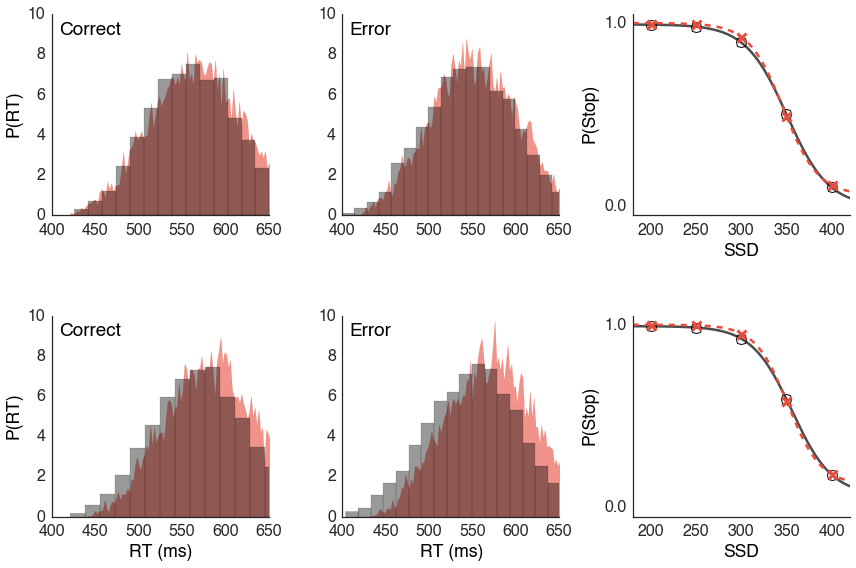

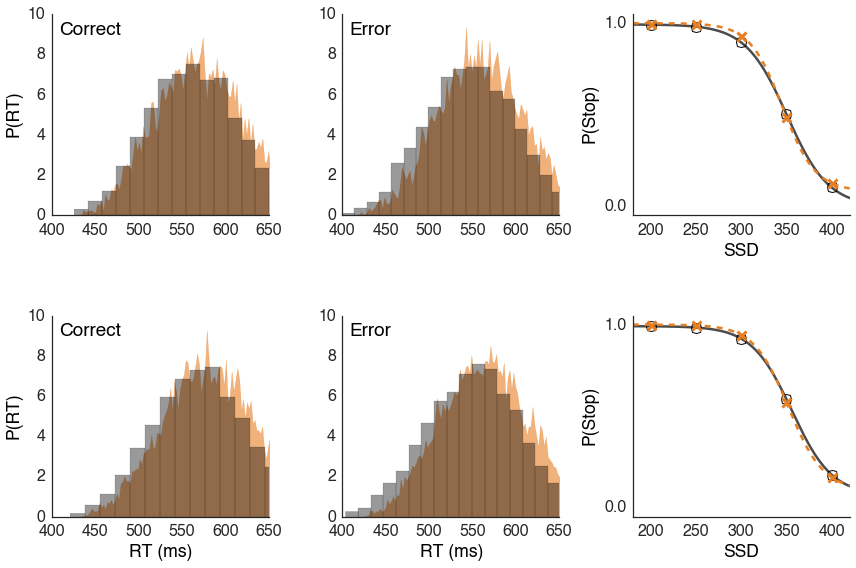

In [237]:
for i, yhat in enumerate(yhats):
      sns.set_context('notebook', font_scale=1.6)
      f, axes = plt.subplots(2,3,figsize=(12, 8))
      
      yhat=yhat.reshape(2,16)
      fitsc = [vis.unpack_yvector(yi)[0] for yi in yhat]
      fitcq = [vis.unpack_yvector(yi)[1] for yi in yhat]
      fiteq = [vis.unpack_yvector(yi)[2] for yi in yhat]
      for ii in range(len(yhat)):
            data_kde = data_kde_all[ii]
            axes_x, pp = vis.plot_data_dists(data=data_kde, cdf=False, axes=axes[ii], data_type='interpolated')
            ax1, ax2, ax3 = axes_x
            fit_cq, fit_eq = [analyze.kde_fit_quantiles(q, bw=.1) for q in [fitcq[ii], fiteq[ii]]]

            sns.kdeplot(fit_cq, color=colors[i], cumulative=False, bw=.001, ax=ax1, linewidth=0, alpha=.60, shade=True)
            sns.kdeplot(fit_eq, color=colors[i], cumulative=False, bw=.001, ax=ax2, linewidth=0, alpha=.60, shade=True)
            vis.scurves([sc[ii], fitsc[ii]], kind='radd', linestyles=['-','--'], ax=ax3, colors=[colors[i]]*2)
            for ax in [ax1, ax2]:
                  if ax.is_last_col():
                        continue
                  ax.set_xlim(.4, .65)
                  if ax.is_first_col():
                        ax.set_ylabel('P(RT)')
                  if ax.is_last_row():
                        ax.set_xlabel('RT (ms)')
                  ax.set_xticklabels([int(xx) for xx in ax.get_xticks()*1000])
            
                  ax.set_ylim(0,10)
            ax1.text(.41, 9, 'Correct', fontsize=19)
            ax2.text(.41, 9, 'Error', fontsize=19)
      plt.tight_layout()
      plt.subplots_adjust(hspace=.5)
      
      plt.savefig(savestrings[i]+'.png', dpi=900)
      plt.savefig(savestrings[i]+'.svg', rasterized=True)

In [ ]:
### os.mkdir('xsab_v')
#os.chdir('../xsab_v')
vis.react_fit_plots(m, color="#16a085", save=True)

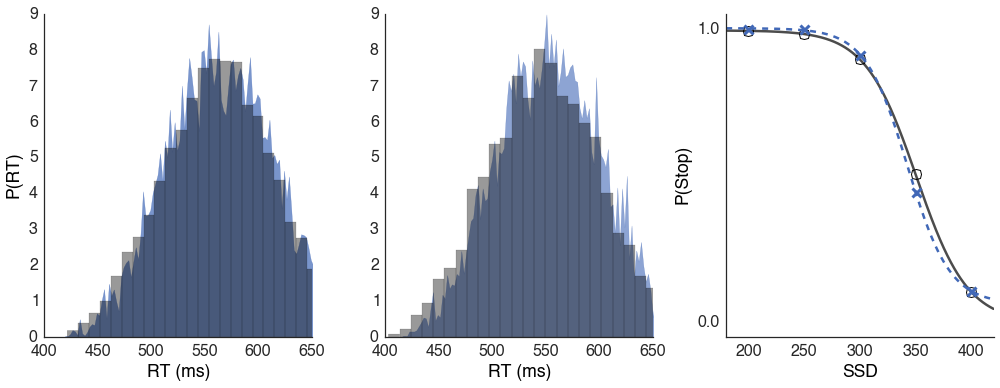

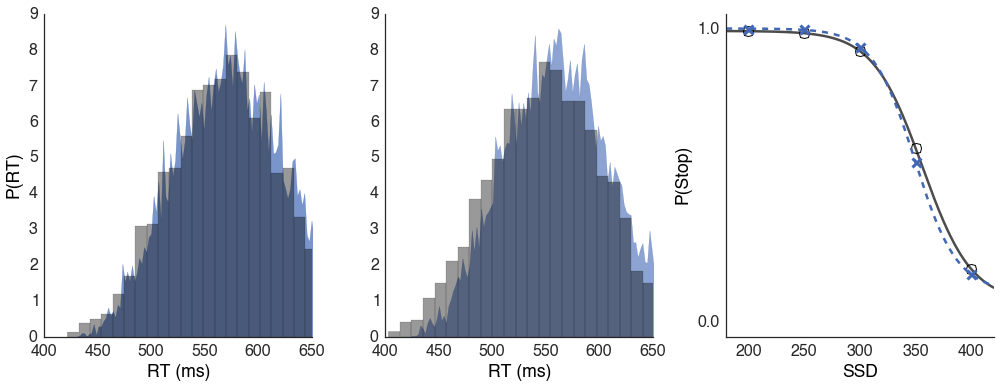

In [139]:
m.fits=yhat
vis.plot_fits(y[0], yhat.reshape(2,16)[0], cdf=False)
vis.plot_fits(y[1], yhat.reshape(2,16)[1], cdf=False)
plt.savefig('xradd_v.png', dpi=600)


In [68]:
bslsc = y[0, 1:6]
pnlsc = y[1, 1:6]
hbsl = yhat[0,1:6]
hpnl = yhat[1,1:6]

In [70]:
colors = ['k', greens[-3], 'k', reds[-3]]
ls = ['-', '--']*2

[0.35046504650465043,
 0.35046504650465043,
 0.34573957395739568,
 0.34573957395739568,
 0.35907590759075908,
 0.35907590759075908,
 0.35998599859986002,
 0.35998599859986002]

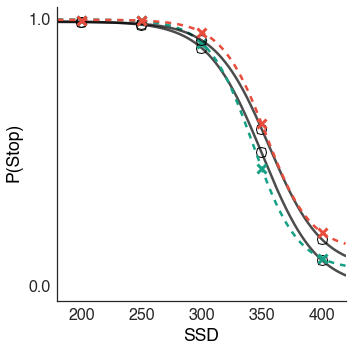

In [71]:
vis.scurves([bslsc, hbsl, pnlsc, hpnl], kind='radd', colors=colors, labels=['bsl','bsl hat','pnl','pnl hat'], linestyles=ls)

In [ ]:
m.simulate()

In [3]:
inits = {'a': 0.44470913,
 'ssv': -0.9415135,
 'tr': 0.30481227,
 'v': 1.07049551,
 'xb': 1.5,
 'z': 0.15049553}
popt={'a': 0.54012, 'z': 0.042014925994818271, 'v': 1.20882, 'xb': .84012, 'ssv': -1.094068, 'tr': 0.18531}

In [4]:
sab_inits={'a': array([ 0.48227]), 'sso': 0.01804612312742325, 'v': array([ 1.18368]), 'xb': array([ 1.43943]), 'ssv': -0.93274357892086091, 'tr': array([ 0.21019])}

In [5]:
m=build.Model(data=redata, kind='xsab', depends_on={'tr':'Cond'}, inits=sab_inits)
m.inits=popt
fidf=pd.DataFrame(columns=m.dframes['fitinfo'].columns, index=np.arange(20))

In [7]:
for i in range(20):
      m.optimize(stage='full', multiopt=True)      
      for c in cols:
            fidf.loc[i, c]=m.fitinfo[c]
      fidf.to_csv("finfo_xsab_tr.csv")

basinhopping step 0: f 0.0929535
basinhopping step 1: f 0.811711 trial_f 0.811711 accepted 1  lowest_f 0.0929535
basinhopping step 2: f 1.31947 trial_f 1.31947 accepted 1  lowest_f 0.0929535
basinhopping step 3: f 0.596971 trial_f 0.596971 accepted 1  lowest_f 0.0929535
basinhopping step 4: f 0.596971 trial_f 1.53642 accepted 0  lowest_f 0.0929535
basinhopping step 5: f 1.21149 trial_f 1.21149 accepted 1  lowest_f 0.0929535
basinhopping step 6: f 1.21149 trial_f 1.48029 accepted 0  lowest_f 0.0929535
basinhopping step 7: f 0.493313 trial_f 0.493313 accepted 1  lowest_f 0.0929535
basinhopping step 8: f 0.980118 trial_f 0.980118 accepted 1  lowest_f 0.0929535
basinhopping step 9: f 0.636143 trial_f 0.636143 accepted 1  lowest_f 0.0929535
adaptive stepsize: acceptance rate 0.700000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 1.26666 trial_f 1.26666 accepted 1  lowest_f 0.0929535
basinhopping step 11: f 1.41001 trial_f 1.41001 accepted 1  lowest_f 0.092

NameError: name 'cols' is not defined

In [6]:
x1 = {'a_bsl':   0.529353,
'a_pnl': 0.553150,
'xb': 0.817502,
'ssv': -1.104875,
'tr': 0.185667,
'v': 1.208608,
'z': 0.0436727}

x2 = {'a': 0.3964024,
 'ssv': -0.7881214,
 'tr': 0.2915253,
 'v_bsl': 0.93931011,
 'v_pnl': 0.88324705,
 'xb': 1.667787,
 'z': 0.1177627}

x3={'a': 0.44534253,
 'ssv':  -.9073797,
 'tr_bsl':   0.29969275,
 'tr_pnl':   0.31056620,
 'v': 0.965766,
 'xb': 1.52569355,
 'z': 0.1591336}

x4={'a': 0.44534253,
 'ssv':  -1.564015,
 'tr_bsl': 0.19521031,
 'tr_pnl': 0.19703793,
 'v_bsl': 1.80694264,
 'v_pnl': 1.75763984,
 'xb': 1.206618,
 'z': 0.001013259}

x4['tr'] = np.mean([x4['tr_bsl'], x4['tr_pnl']])
x4['v'] = np.mean([x4['v_bsl'], x4['v_pnl']])
x2['v'] = np.mean([x2['v_bsl'], x2['v_pnl']])
x3['tr'] = np.mean([x3['tr_bsl'], x3['tr_pnl']])
x1['a'] = np.mean([x1['a_bsl'], x1['a_pnl']])

In [7]:
finfo_list, yhat_list = [], []

In [8]:
for i in range(20):
      
      xinits_list = [deepcopy(xdct) for xdct in [x1,x2,x3,x4]]
      parameter = 'v'
      depends_on = {parameter:'Cond'}

      d = '/'.join(['FinalRe', parameter+'iii'])
      if not os.path.isdir(pth+d):
            os.mkdir(pth+d)
      os.chdir(pth+d)

      for xi in xinits_list:
            model = build.Model(data=redata, kind='xradd', inits=xi, depends_on=depends_on)
            model.make_optimizer(tol=1.e-5, multiopt=True, maxfev=500)
            opt=model.opt
            opt.make_simulator()

            ydata, ywts = model.avg_y, model.avg_wts
            # STAGE 3 (Final Simplex)
            yhat, finfo, xiv = opt.gradient_descent(y=ydata, wts=ywts, inits=xi, is_flat=False)

            finfo_list.append(finfo)
            yhat_list.append(yhat)

Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 26
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.000052
         Iterations: 87
         Function evaluations: 240
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 26
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: 0.000059
         Iterations: 36
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 22
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 21
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000057
         Iterations: 23
         Function evaluations: 65
Optimization terminated successfu

In [9]:
dfx = pd.DataFrame([fi.T for fi in finfo_list])
dff = dfx[['cnvrg', 'logp', 'chi', 'rchi', 'AIC', 'BIC', 'a', 'v_bsl', 'v_pnl', 'ssv', 'xb', 'tr', 'z']]
dff.to_csv('xradd_v_bootinfo.csv', index=False)

yfits = np.vstack([np.vstack(yh.reshape(2,16)) for yh in yhat_list])
cond = ['bsl', 'pnl']*int(len(yfits)/2)
yhatdf = pd.DataFrame(yfits)
yhatdf.insert(0, 'Cond', cond)
yhatdf.to_csv('xradd_v_bootfits.csv')

In [ ]:
f, axes = plt.subplots(2,3,figsize=(12, 7))
sns.set_context('notebook', font_scale=1.6)
fits=m.fits.reshape(2,16)
y=m.avg_y
labels=['Baseline', 'Caution']
datas=[redata.query('Cond=="bsl"'), redata.query('Cond=="pnl"')]
colors=["#e74c3c"]*2
for i in range(m.ncond):
      vis.plot_fits(y[i], fits[i], kind='radd', colors=["#e74c3c"]*2, data=datas[i], axes=axes[i])

for ax in axes.flatten():
      if ax.is_last_col():
            continue
      ax.set_ylim(0,11)

plt.savefig('re_drift_fitsII.png', dpi=500)
plt.savefig('re_drift_fitsII.svg', rasterized=True)